In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mplfinance as mpf
import talib
from sklearn import tree, ensemble, model_selection, cluster, metrics
from sklearn.feature_extraction import text
import jieba
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/home/VENV36/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<div class="jumbotron">
    <p class="display-1 h1">Alpha模型——数据驱动</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 数据挖掘基础

## 数据挖掘

<dl class="row alert-info">
    <dt class="col-md-3">数据挖掘</dt>
    <dd class="col-md-9">从大量的数据中通过<strong>算法</strong>搜索<strong>隐藏</strong>于其中的信息的过程。</dd>
</dl>

### 挖掘算法分类

<center>
    <img src="./img/dataMining/miningAlgo.png" width=100%>
</center>

### 数据挖掘建模流程

<center><img src="./img/dataMining/miningModelling.png" width=80%></center>

## `scikit-learn`介绍

`scikit-learn`软件包

[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

- `scikit-learn`是`Python`的一个开源机器学习模块，它建立在`NumPy`，`SciPy`和`matplotlib`模块之上

- 为用户提供各种机器学习算法接口，可以让用户简单、高效地进行数据挖掘和数据分析

### `sklearn`数据挖掘一般流程

<center><img src="./img/dataMining/sklearnApp.png" width=80%></center>

## 其他数据挖掘模块

- PySpark：针对大数据的数据挖掘与机器学习工具，是`Spark`的`Python`接口

- Apache `Spark`
    + `Spark`：专为大规模数据处理而设计的快速通用的计算引擎

- 官网：[http://spark.apache.org/docs/latest/api/python/index.html](http://spark.apache.org/docs/latest/api/python/index.html)

- 学习链接：[http://codingdict.com/article/8888](http://codingdict.com/article/8888)

- Tensorflow：开源机器学习平台

- 官网：[https://tensorflow.google.cn/](https://tensorflow.google.cn/)

# 分类模型

## 基本概念

### 分类（classification） 

- 给定一条记录$(\boldsymbol{x}, y)$，其中，$y$是分类属性或者目标属性，$\boldsymbol{x}$是该记录预测属性的集合

- 通过学习得到一个**目标函数**（target function）$f$，把每个属性集$\boldsymbol{x}$映射到一个预先定义的**类标签**$y$

$$
y = f(\boldsymbol{x})
$$

- 目标函数也被称作**分类模型**（classification model）

### 建立分类模型的一般方法

<center><img src="./img/dataMining/classificationProcess.png" width=80%></center>

#### 训练集与检验集

- 训练集（training set）：由类标签已知的数据记录组成，用于建立分类模型

- 检验集（test set）：用来检验分类规则的数据记录集合

#### 分类算法

+ k最近邻分类
+ 决策树
+ 朴素贝叶斯分类
+ 逻辑回归
+ 神经网络
+ 支持向量机
+ 随机森林

## 决策树

### 基本概念

<center><img src="./img/dataMining/classificationSample.gv.svg" with=100%></center>

<center><img src="./img/dataMining/decisionTreeC.gv.svg" with=60%></center>

### `sklearn`实现 

#### 建立模型

```python
from sklearn import tree
tree.DecisionTreeClassifier(criterion='gini'）
```
- `criterion`：`str`类型，不纯性的度量，可以是`gini`和`entropy`，默认是`gini`

- 生成的决策树的属性（Attributes）
    + `classes_ `：由类标签构成的数组
    + `n_classes_`：`int`，类别的数量
    + `tree_`：建立的决策树

In [96]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### **One-Hot Encoding**：将标称属性转换成二元属性

> `DecisionTreeClassifer`只支持数值型预测属性
- 但是对类别标签没有要求

```python
pandas.get_dummies(data, columns=None)
```
- `data`：`Series`类型，或者`DataFrame`类型
- `columns`：列名的`list`类型，数据集中哪些列需要转换，默认是将数据集中所有列进行转换
- 返回值：由二元化的属性构成的`DataFrame`

##### one-hot编码

In [101]:
titX = titDf.iloc[:,:-1]
titY = titDf['Survived']
titX.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [102]:
titXOH = pd.get_dummies(titX,columns=['Sex','Embarked'])
titXOH.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


### 决策树的剪枝

- 为什么需要剪枝？
    + 生成的决策树过于复杂，对训练集的过度拟合
    + 决策树算法没有考虑数据中存在噪声

- 剪枝方法
    + 先剪枝
    + 后剪枝

#### 先剪枝（Forward-Pruning）

<p class="alert alert-info">提前停止树的构造而对树进行剪枝</p>

- 在决策树到达一定高度的情况下就停止树的生长
- 到达结点的样本个数小于某一个阈值可停止树的生长

#### 后剪枝（Post-Pruning）

<p class="alert alert-danger">构造完整的决策树，然后用叶结点替换那些置信度不够的结点的子树，该叶结点所应标记的类别为被替换的子树中大多数样本所属的类别。</p>

## 用决策树分类收益率

- 问题：如何预测下一个周期收益率是上升还是下降？

### 读入并整理数据

In [217]:
rbd = pd.read_csv('./data/strategy/rbDaily.csv')
rbd.head()

,ActionDay,Close,High,Low
0,20160104,1775,1806,1773
1,20160105,1779,1790,1761
2,20160106,1783,1786,1766
3,20160107,1772,1786,1747
4,20160108,1752,1775,1750


In [219]:
rbd['ActionDay'] = pd.to_datetime(rbd['ActionDay'],format='%Y%m%d')
rbd.set_index('ActionDay',inplace=True)
rbd.head()

,Close,High,Low,Open
ActionDay,,,,
2016-01-04,1775,1806,1773,1775
2016-01-05,1779,1790,1761,1779
2016-01-06,1783,1786,1766,1783
2016-01-07,1772,1786,1747,1772
2016-01-08,1752,1775,1750,1752


### 构建分类标签

- 以日收益率作为分类标签

In [220]:
rbd['ret'] = rbd['Close'].pct_change()
rbd.head()

,Close,High,Low,Open,ret
ActionDay,,,,,
2016-01-04,1775,1806,1773,1775,NaN
2016-01-05,1779,1790,1761,1779,0.002254
2016-01-06,1783,1786,1766,1783,0.002248
2016-01-07,1772,1786,1747,1772,-0.006169
2016-01-08,1752,1775,1750,1752,-0.011287


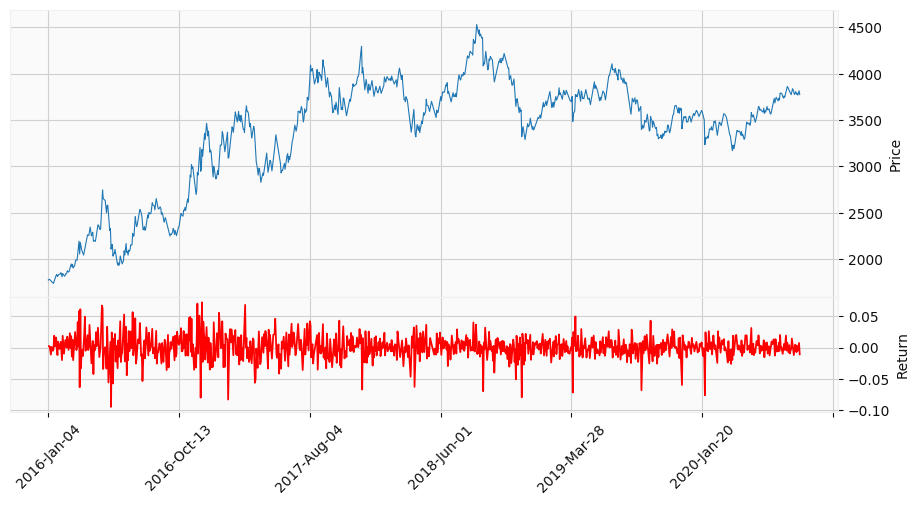

In [221]:
addFig = [mpf.make_addplot(rbd['ret'],panel=1,type='line',color='red',ylabel='Return')]
mpf.plot(rbd,type='line',style='yahoo',addplot=addFig,figratio=(12,6),figscale=1)

In [222]:
rbd['y'] = np.where(rbd['ret'] > 0,1,-1)
rbd.head()

,Close,High,Low,Open,ret,y
ActionDay,,,,,,
2016-01-04,1775,1806,1773,1775,NaN,-1
2016-01-05,1779,1790,1761,1779,0.002254,1
2016-01-06,1783,1786,1766,1783,0.002248,1
2016-01-07,1772,1786,1747,1772,-0.006169,-1
2016-01-08,1752,1775,1750,1752,-0.011287,-1


### 构建分类属性（特征）

#### 动量因子

- 商品的超额收益在过去7日内的均值

In [228]:
rbd['mf'] = talib.SMA(rbd['ret'],timeperiod=7)
rbd.head(14)

,Close,High,Low,Open,ret,y,mf
ActionDay,,,,,,,
2016-01-04,1775,1806,1773,1775,NaN,-1,NaN
2016-01-05,1779,1790,1761,1779,0.002254,1,NaN
2016-01-06,1783,1786,1766,1783,0.002248,1,NaN
2016-01-07,1772,1786,1747,1772,-0.006169,-1,NaN
2016-01-08,1752,1775,1750,1752,-0.011287,-1,NaN
2016-01-09,1754,1756,1748,1754,0.001142,1,NaN
2016-01-11,1753,1772,1750,1753,-0.000570,-1,NaN
2016-01-12,1744,1759,1735,1744,-0.005134,-1,-0.002502
2016-01-13,1740,1748,1736,1740,-0.002294,-1,-0.003152


#### 波动率因子

- 因子构成：变异系数
\begin{align}
  &\frac{\sigma^2}{|\mu|}\\
  &\sigma^2=\frac{1}{D-1}\sum_{d=1}^D(r_{d,Front}-\mu)^2\\
  &\mu = \frac{1}{D}\sum_{d=1}^Dr_{d,Front}
\end{align}

In [232]:
retMu7 = talib.SMA(rbd['ret'],timeperiod=7)
retVar7 = talib.VAR(rbd['ret'],timeperiod=7)
rbd['vola'] = retVar7/np.abs(retMu7)
rbd.head(14)

,Close,High,Low,Open,ret,y,mf,vola
ActionDay,,,,,,,,
2016-01-04,1775,1806,1773,1775,NaN,-1,NaN,NaN
2016-01-05,1779,1790,1761,1779,0.002254,1,NaN,NaN
2016-01-06,1783,1786,1766,1783,0.002248,1,NaN,NaN
2016-01-07,1772,1786,1747,1772,-0.006169,-1,NaN,NaN
2016-01-08,1752,1775,1750,1752,-0.011287,-1,NaN,NaN
2016-01-09,1754,1756,1748,1754,0.001142,1,NaN,NaN
2016-01-11,1753,1772,1750,1753,-0.000570,-1,NaN,NaN
2016-01-12,1744,1759,1735,1744,-0.005134,-1,-0.002502,0.009119
2016-01-13,1740,1748,1736,1740,-0.002294,-1,-0.003152,0.006083


#### 价值因子

- 因子构成

\begin{equation}
  \ln\frac{\frac{1}{D}\sum_{d=1}^D f_{d,Front}}{f_{t,Front}}
\end{equation}

In [234]:
closeMu7 = talib.SMA(rbd['Close'],timeperiod=7)
rbd['val'] = np.log(closeMu7/rbd['Close'])
rbd.head(14)

,Close,High,Low,Open,ret,y,mf,vola,val
ActionDay,,,,,,,,,
2016-01-04,1775,1806,1773,1775,NaN,-1,NaN,NaN,NaN
2016-01-05,1779,1790,1761,1779,0.002254,1,NaN,NaN,NaN
2016-01-06,1783,1786,1766,1783,0.002248,1,NaN,NaN,NaN
2016-01-07,1772,1786,1747,1772,-0.006169,-1,NaN,NaN,NaN
2016-01-08,1752,1775,1750,1752,-0.011287,-1,NaN,NaN,NaN
2016-01-09,1754,1756,1748,1754,0.001142,1,NaN,NaN,NaN
2016-01-11,1753,1772,1750,1753,-0.000570,-1,NaN,NaN,0.007874
2016-01-12,1744,1759,1735,1744,-0.005134,-1,-0.002502,0.009119,0.010511
2016-01-13,1740,1748,1736,1740,-0.002294,-1,-0.003152,0.006083,0.009641


#### 删除含有缺失值的行

In [235]:
rbd.dropna(inplace=True)
rbd.head()

,Close,High,Low,Open,ret,y,mf,vola,val
ActionDay,,,,,,,,,
2016-01-12,1744,1759,1735,1744,-0.005134,-1,-0.002502,0.009119,0.010511
2016-01-13,1740,1748,1736,1740,-0.002294,-1,-0.003152,0.006083,0.009641
2016-01-14,1773,1777,1732,1773,0.018966,1,-0.000764,0.103671,-0.009960
2016-01-15,1794,1796,1760,1794,0.011844,1,0.001810,0.050343,-0.019946
2016-01-16,1797,1798,1792,1797,0.001672,1,0.003661,0.017256,-0.017968


### 构建决策树模型

#### 划分训练集与检验集

In [237]:
rbdTrain,rbdTest = train_test_split(rbd,test_size=0.25,random_state=10)
rbdTrain.head()
rbdTest.head()

,Close,High,Low,Open,ret,y,mf,vola,val
ActionDay,,,,,,,,,
2016-04-19,2583,2586,2417,2583,0.067355,1,0.017284,0.045053,-0.078974
2019-05-23,3840,3912,3827,3840,-0.018154,-1,0.006717,0.020877,-0.005334
2016-05-06,2329,2352,2281,2329,0.009099,1,-0.014395,0.054072,0.048606
2016-12-21,3155,3199,3093,3155,-0.006612,-1,-0.013092,0.025347,0.034927
2017-09-08,3854,4038,3853,3854,-0.033116,-1,-0.002395,0.205826,0.041353


,Close,High,Low,Open,ret,y,mf,vola,val
ActionDay,,,,,,,,,
2016-04-09,2250,2258,2244,2250,0.002227,1,-0.000827,0.440944,-0.011944
2016-11-28,3204,3238,3140,3204,0.023315,1,0.020670,0.049165,-0.085262
2020-08-03,3849,3857,3778,3849,0.019333,1,0.002288,0.035636,-0.021155
2016-04-18,2420,2427,2339,2420,0.041756,1,0.010646,0.035538,-0.031056
2016-03-10,2109,2198,2068,2109,-0.033012,-1,0.009716,0.195223,-0.006388


#### 构建并训练决策树

In [239]:
rbdTree = tree.DecisionTreeClassifier()

In [241]:
rbdTree.fit(rbdTrain.loc[:,['mf','vola','val']],rbdTrain['y'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 训练集分类效果检验

In [251]:
rbdTrainYPre = rbdTree.predict(rbdTrain.loc[:,['mf','vola','val']])

In [250]:
metrics.accuracy_score(rbdTrain['y'],rbdTrainYPre)

1.0

In [244]:
metrics.f1_score(rbdTrain['y'],rbdTrainYPre,pos_label=1)

1.0

In [245]:
metrics.f1_score(rbdTrain['y'],rbdTrainYPre,pos_label=-1)

1.0

#### 检验集分类效果检验

In [246]:
rbdTestYPre = rbdTree.predict(rbdTest.loc[:,['mf','vola','val']])

In [247]:
metrics.accuracy_score(rbdTest['y'],rbdTestYPre)

0.6083916083916084

In [248]:
metrics.f1_score(rbdTest['y'],rbdTestYPre,pos_label=1)

0.6137931034482759

In [249]:
metrics.f1_score(rbdTest['y'],rbdTestYPre,pos_label=-1)

0.6028368794326241

### 显示决策树

<Figure size 1200x600 with 0 Axes>

[Text(460.0856413994169, 449.8421052631579, 'X[2] <= 0.003\ngini = 0.499\nsamples = 857\nvalue = [408, 449]'),
 Text(249.78498542274053, 425.5263157894737, 'X[2] <= -0.019\ngini = 0.426\nsamples = 513\nvalue = [158, 355]'),
 Text(75.0710641399417, 401.2105263157895, 'X[0] <= 0.016\ngini = 0.269\nsamples = 162\nvalue = [26, 136]'),
 Text(36.26457725947522, 376.89473684210526, 'X[2] <= -0.041\ngini = 0.228\nsamples = 145\nvalue = [19, 126]'),
 Text(30.841836734693878, 352.57894736842104, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(41.68731778425656, 352.57894736842104, 'X[2] <= -0.039\ngini = 0.276\nsamples = 115\nvalue = [19, 96]'),
 Text(36.26457725947522, 328.2631578947369, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(47.1100583090379, 328.2631578947369, 'X[0] <= 0.005\ngini = 0.256\nsamples = 113\nvalue = [17, 96]'),
 Text(10.845481049562682, 303.9473684210526, 'X[1] <= 0.513\ngini = 0.056\nsamples = 35\nvalue = [1, 34]'),
 Text(5.422740524781341, 279.63157894736844, 'gi

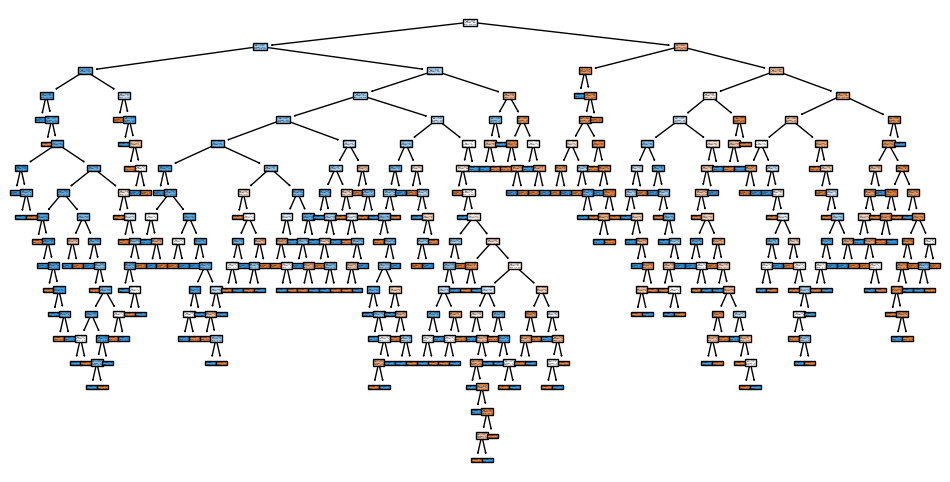

In [254]:
plt.figure(figsize=(12,6))
tree.plot_tree(rbdTree,filled=True)

## 集成学习

<dl class="row alert-danger">
    <dt class="col-md-3">集成学习（ensemble learning）</dt>
    <dd class="col-md-9">通过构建并结合多个分类器来完成学习任务。</dd>
</dl>

- 典型方法
    - 装袋算法（bagging）与随机森林（random forest）
    - 提升算法（boosting）

### boosting算法

- 将弱分类器提升为强分类器的算法

- 通过顺次迭代的方式生成最终的分类器

- 基本思想

1. 初始化，令残差等于当前的类标签，即$r_i=y_i, i=1,2,\cdots,n$

2. 设置需要生成的分类器的数量，$B$，对于每一个$b\in B$进行如下操作：
    1. 在训练集上生成第$b$个分类器$\hat{f}_b(\boldsymbol{\rm x})$;
    
    2. 更新类标签（残差），$r_i=r_i-\alpha_b\hat{f}_b(\boldsymbol{\rm x})$

3. 将单个分类器叠加得到最终的分类器
$$
    \hat{f}(\boldsymbol{\rm x})=\sum_{b=1}^B\alpha_b\hat{f}_b(\boldsymbol{\rm x})
$$

- 原理：每个新的分类器都是在上次分类的残差上拟合，使得最终的分类器能够对单个分类器分类较差的区域给予改进

- 常用的提升算法
    - AdaBoost
    - xgboost
    - LogitBoost

## 随机森林（Random Forest）

### 装袋

<dl class="row alert-info">
    <dt class="col-md-3">自助法（bootstraping）</dt>
    <dd class="col-md-9">有放回的随机采样方法。</dd>
</dl>

- 解决金融交易中只有一条历史样本数据的问题

- 原理：如果$N$个独立同分布（$iid$）的样本，每个样本的方差为$\sigma^2$，那么样本均值的方差为$\frac{\sigma^2}{N}$

- 装袋过程
    1. 通过自助采样，生成$B$个样本；
    2. 在每个样本上训练一个分类器$\hat{f}_b(\boldsymbol{\rm x})$；
    3. 将各个分类器合成得到最终分类器
    $$
        \hat{f}_{\text{avg}}(\boldsymbol{\rm x})=\frac{1}{B}\sum_{b=1}^B\hat{f}_b(\boldsymbol{\rm x})
    $$

### 随机森林

- 特征装袋（feature bagging），降低不同决策树之间的相关性

- 组合多个决策树，通过投票的方式确定样本所属的类别，使得整体模型在抑止过度拟合的同时，获得较好的精确度

<center><img src="./img/dataMining/randomForest.jpg" width=100%></center>

### 建立随机森林模型

```python
from sklearn import ensemble
ensemble.RandomForestClassifier()
```

In [289]:
rbRandTree = ensemble.RandomForestClassifier(random_state=10)

In [290]:
rbRandTree.fit(rbdTrain.loc[:,['mf','vola','val']],rbdTrain['y'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

### 训练集分类效果检验

In [262]:
rbRandTrainYPre = rbRandTree.predict(rbdTrain.loc[:,['mf','vola','val']])

In [263]:
metrics.accuracy_score(rbRandTrainYPre,rbdTrain['y'])

1.0

In [264]:
metrics.f1_score(rbRandTrainYPre,rbdTrain['y'],pos_label=1)

1.0

In [265]:
metrics.f1_score(rbRandTrainYPre,rbdTrain['y'],pos_label=-1)

1.0

### 检验集分类效果检验

In [266]:
rbRandTestYPre = rbRandTree.predict(rbdTest.loc[:,['mf','vola','val']])

In [267]:
metrics.accuracy_score(rbRandTestYPre,rbdTest['y'])

0.6538461538461539

In [268]:
metrics.f1_score(rbRandTestYPre,rbdTest['y'],pos_label=1)

0.6732673267326733

In [269]:
metrics.f1_score(rbRandTestYPre,rbdTest['y'],pos_label=-1)

0.6319702602230484

In [283]:
rbRandTreeNew = ensemble.RandomForestClassifier(random_state=10)

In [288]:
trainScores = model_selection.cross_val_score(rbRandTreeNew,rbd.loc[:,['mf','vola','val']],rbd['y'],cv=5)
trainScores

array([0.70491803, 0.7398374 , 0.69291339, 0.70434783, 0.69135802])

In [286]:
trainScores.mean()

0.6876618401899945

# 聚类模型

## 基本概念

<dl class="row alert-info">
    <dt class="col-md-2">聚类</dt>
    <dd class="col-md-10">是一种将特征相似的样本聚集到一起，从而达到区分具有不同特征的样本的目的无监督的算法</dd>
</dl>

- 不需要事先知道类别信息

- 聚类形成的每一个组，被称为**簇（cluster）**

- 聚类的目标：簇内的样本之间尽可能相似，不同簇的样本尽可能不同

<img src="./img/dataMining/clustering.png" width=50%>

## K均值

- 基于划分的聚类，发现指定个数（$K$）的簇

- 基本思想：利用样本之间的距离衡量样本之间的相似性，用一组样本的质心（该组样本的均值）作为簇的中心，找到紧凑且独立的簇

- 簇之间彼此**互斥**，即每个样本**只能**分属于一个簇

### 基本算法

<center><img src='./img/dataMining/kmago.svg' width=100%></center>

##### $K$均值聚类过程示例

<center><img src="./img/dataMining/kmeansProcess.gif" width=100%></center>

#### 距离的度量

- 欧式空间：欧几里得距离，$n$维空间中两个点$\boldsymbol{x}$和$\boldsymbol{y}$之间的欧几里得距离是:
$$
d(\boldsymbol{x}, \boldsymbol{y}) = \sqrt{\sum_{k=1}^n(x_k-y_k)^2}
$$

#### 目标函数

- 目标函数为每个点到最近质心的欧几里得距离的**误差平方和**（sum of the squared error, SSE）最小

$$
\begin{split}
SSE &= \sum_{i=1}^K\sum_{\boldsymbol{x}\in C_i}d(\boldsymbol{c}_i, \boldsymbol{x})^2\\
\boldsymbol{c}_i&=\frac{1}{m_i}\sum_{\boldsymbol{x}\in C_i}\boldsymbol{x}
\end{split}
$$
其中，$\boldsymbol{x}$是数据点，$C_i$是第$i$个簇，$c_i$是第$i$个簇的质心，$m_i$是第$i$个簇包含的数据点的个数，$K$是簇的个数

- 簇内的误差平方和（SSE）也被称作cluster inertia

### $K$均值的`Python`实现

```python
from sklearn.cluster import KMeans
KMeans(n_clusters=8, init=’k-means++’, max_iter=300, random_state=None, n_jobs=None)
```
- `n_clusters`：`int`类型，簇的个数
- `init`：初始质心的方法，可以选择`k-means++`或`random`
- `max_iter`：最大迭代次数
- `random_state`：初始质心的随机生成种子
- `n_jobs`：用多少个CPU运行

#### 选择$K$值

> 随着$K$值的增大，簇内误差平方和（SSE）会降低

<dl class="row alert-info">
    <dt class="col-xl-4">肘部(elbow)法则<dt>
    <dd class="col-xl-8">识别SSE<strong>开始快速增大</strong>处的$K$值</dd>
</dl>

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

[[Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')]]

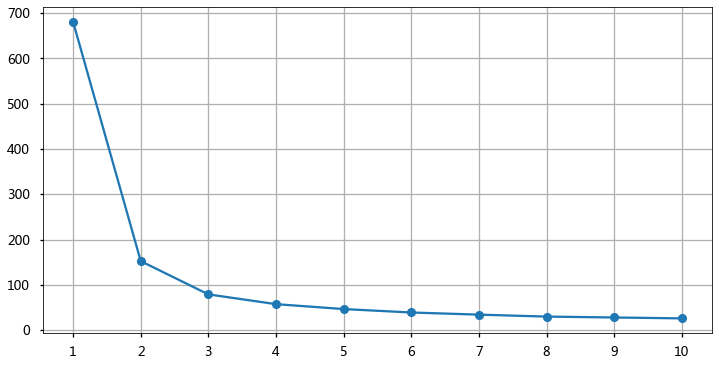

In [12]:
sse = []                ###记录每个k值对应的SSE
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=0,n_jobs=-1)
    km.fit(irisX)
    sse.append(km.inertia_)
ax = pd.Series(sse).plot(kind='line',figsize=(12,6),marker='o',grid=True,xticks=range(0,10))   #xticks：在哪些位置显示x轴刻度标签
ax.set(xticklabels=range(1,11))        # 改变x轴标签显示，默认是从0开始

- 当$K=3$的时候，SSE**开始快速增大**，所以选择3个簇

## 聚类ohlc数据

- 问题：识别市场状态（market regimes），趋势还是震荡？

### 读入数据

In [79]:
rbBar = pd.read_csv('./data/models/rbChangeContract.csv')
rbBar.head()
rbBar.shape

,Date,Open,High,Low,Close
0,2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0
1,2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0
2,2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0
3,2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0
4,2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0


(54314, 5)

In [80]:
rbBar['Date'] = pd.to_datetime(rbBar['Date'],format='%Y-%m-%d %H:%M:%S')
rbBar.set_index('Date',inplace=True)
rbBar.head()

,Open,High,Low,Close
Date,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0


### 归一化数据

- 目的：使得各交易时段的数据可比

- 以每个交易时段内的开盘价作为基准

In [81]:
rbBar['HO'] = rbBar['High']/rbBar['Open']
rbBar['LO'] = rbBar['Low']/rbBar['Open']
rbBar['CO'] = rbBar['Close']/rbBar['Open']
rbBar.head()

,Open,High,Low,Close,HO,LO,CO
Date,,,,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0,1.001169,0.999708,1.000876
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0,1.000584,0.999416,1.000292
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0,1.000000,0.999417,0.999417
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0,1.000292,0.999708,1.000292
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0,1.000292,0.999708,1.000000


In [83]:
rbCluster = rbBar.loc[:,['HO','LO','CO']]
rbCluster.head()

,HO,LO,CO
Date,,,
2019-12-05 14:15:00,1.001169,0.999708,1.000876
2019-12-05 14:16:00,1.000584,0.999416,1.000292
2019-12-05 14:17:00,1.000000,0.999417,0.999417
2019-12-05 14:18:00,1.000292,0.999708,1.000292
2019-12-05 14:19:00,1.000292,0.999708,1.000000


### 选择`k`值

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

[[Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')]]

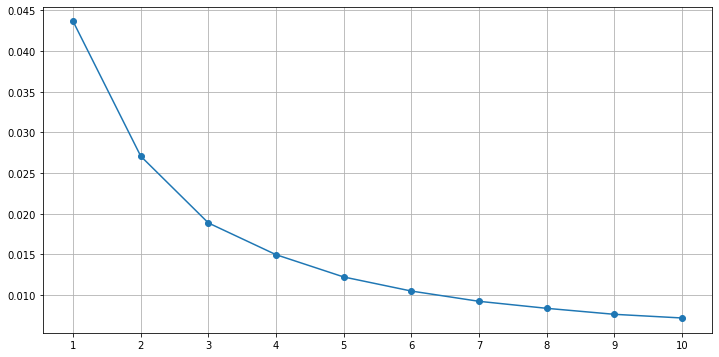

In [121]:
rbSSE = []
for i in range(1,11):
    tmp = cluster.KMeans(n_clusters=i,random_state=10)
    tmp.fit(rbCluster)
    rbSSE.append(tmp.inertia_)
axrb = pd.Series(rbSSE).plot(kind='line',figsize=(12,6),marker='o',grid=True,xticks=range(0,10))
axrb.set(xticklabels=range(1,11))  

- 选择$k=3$

### 聚类

In [113]:
rbkm = cluster.KMeans(n_clusters=3,random_state=10)
rbkm.fit(rbCluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [101]:
rbBar['Cluster'] = rbkm.labels_
rbBar.head()

,Open,High,Low,Close,HO,LO,CO,Cluster
Date,,,,,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0,1.001169,0.999708,1.000876,2
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0,1.000584,0.999416,1.000292,0
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0,1.000000,0.999417,0.999417,1
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0,1.000292,0.999708,1.000292,0
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0,1.000292,0.999708,1.000000,0


In [114]:
metrics.silhouette_score(rbCluster,rbkm.labels_)

0.4294822728303344

### 可视化展示

Text(0.5, 0, 'High/Open')

Text(0.5, 0, 'Low/Open')

Text(0.5, 0, 'Close/Open')

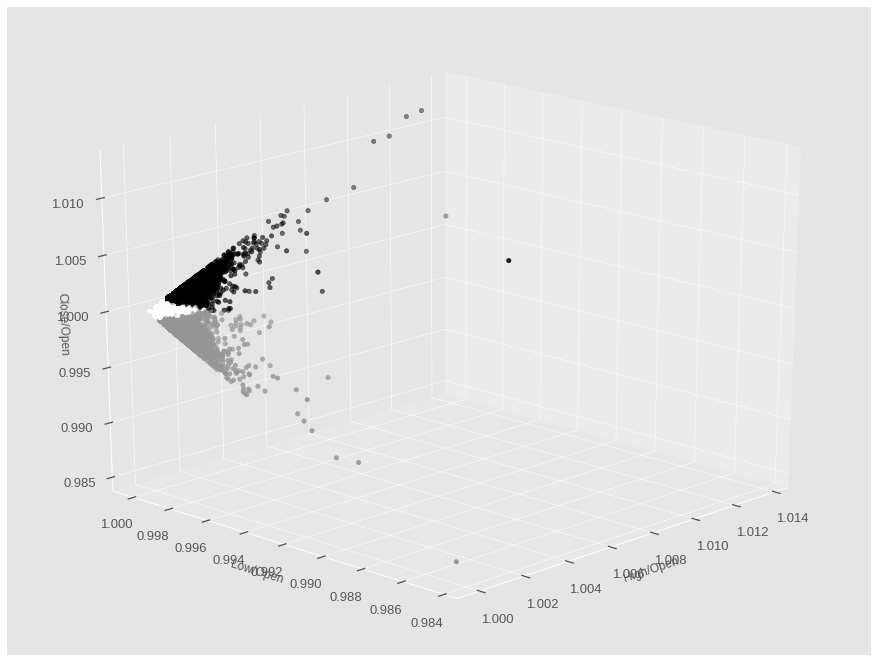

In [137]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig, elev=21, azim=-136)
ax.scatter(
    rbBar["HO"], rbBar["LO"], rbBar["CO"], 
    c=rbkm.labels_.astype(np.float)
)
ax.set_xlabel('High/Open')
ax.set_ylabel('Low/Open')
ax.set_zlabel('Close/Open')
plt.style.use('seaborn-poster')
plt.show()

# 阅读材料 

- Cavalcante, Rodolfo C., et al. [Computational Intelligence and Financial Markets: A Survey and Future Directions](https://www.sciencedirect.com/science/article/pii/S095741741630029X). Expert Systems with Applications 55 (2016): 194-211